In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Temperature_Forcast.csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
print("The shape of dataset is:",df.shape)

The shape of dataset is: (7752, 25)


In [9]:
df=df.drop_duplicates()
print(f"rows and columns after dropping duplicates: " ,df.shape)

rows and columns after dropping duplicates:  (7752, 25)


In [10]:
print("Columns and Data Types:")
print(df.dtypes)

Columns and Data Types:
station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object


In [11]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [12]:
df.dropna(subset=['station', 'Date'], inplace=True)

In [13]:
numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber data type columns are:\n",numerical_cols)


Number data type columns are:
 ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


In [14]:
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [15]:
print(df.isnull().sum())

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64


In [16]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,...,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768464,23.225742,56.758747,88.377125,29.613845,23.512997,7.096501,62.495273,0.368744,...,0.482312,0.276208,0.267307,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275437,22.932837
std,7.211568,2.953516,2.398327,14.585101,7.149011,2.928357,2.330881,2.166519,33.516382,0.261096,...,1.737965,1.142722,1.185994,0.050335,0.079406,54.256953,1.369833,428.996445,3.117994,2.478851
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,...,0.024224,0.009685,0.000686,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


In [17]:
df.nunique().to_frame("unique values")

,unique values
station,25
Date,310
Present_Tmax,168
Present_Tmin,156
LDAPS_RHmin,7673
LDAPS_RHmax,7665
LDAPS_Tmax_lapse,7676
LDAPS_Tmin_lapse,7676
LDAPS_WS,7676
LDAPS_LH,7676


<Axes: >

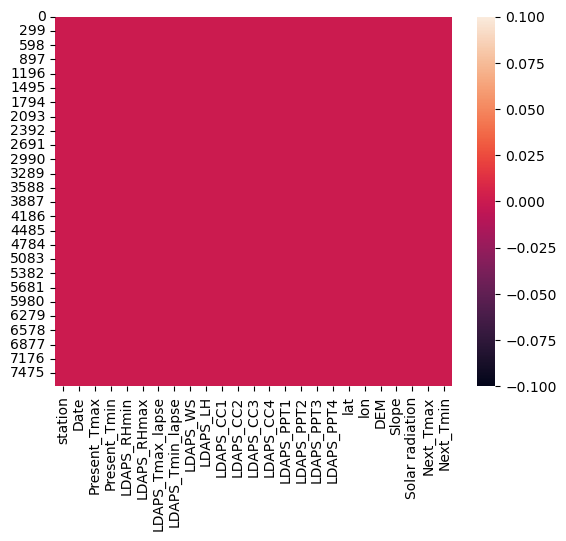

In [18]:
sns.heatmap(df.isnull())

In [19]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 168, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
29.7      1
29.6      1
14.3      1
29.9      1
15.0      1
Name: Present_Tmin, Length: 156, dtype: int64


56.758747    75
71.658089     2
77.030350     2
51.810596     2
39.882526     1
   

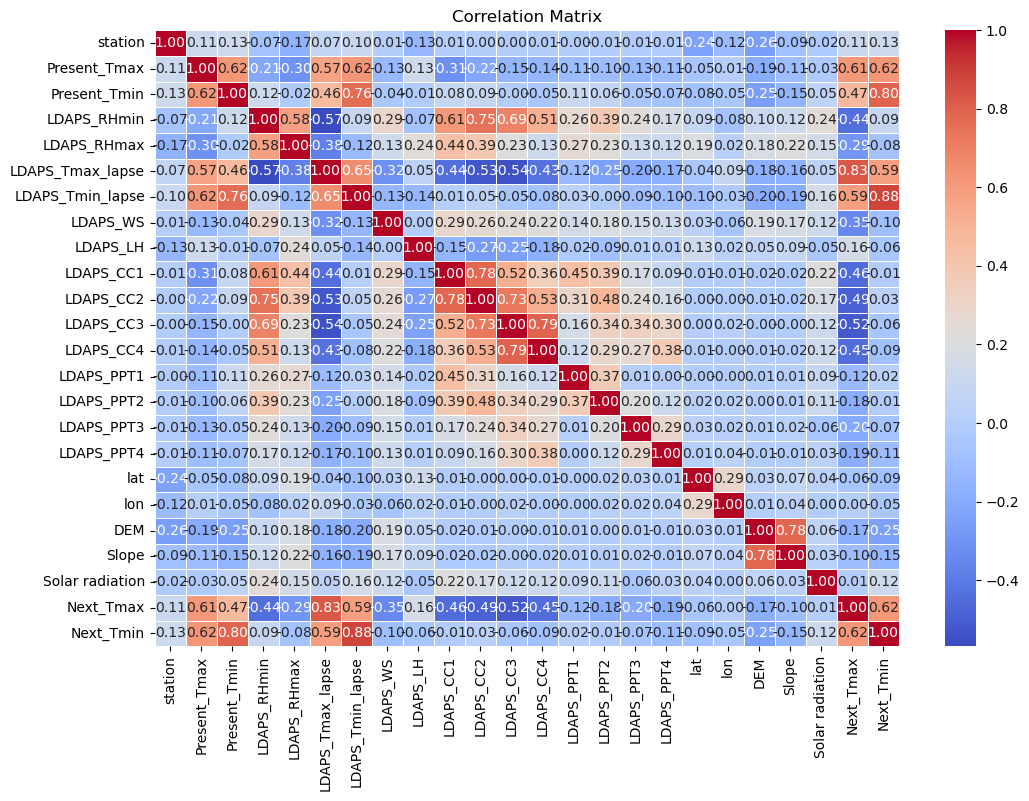

In [20]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

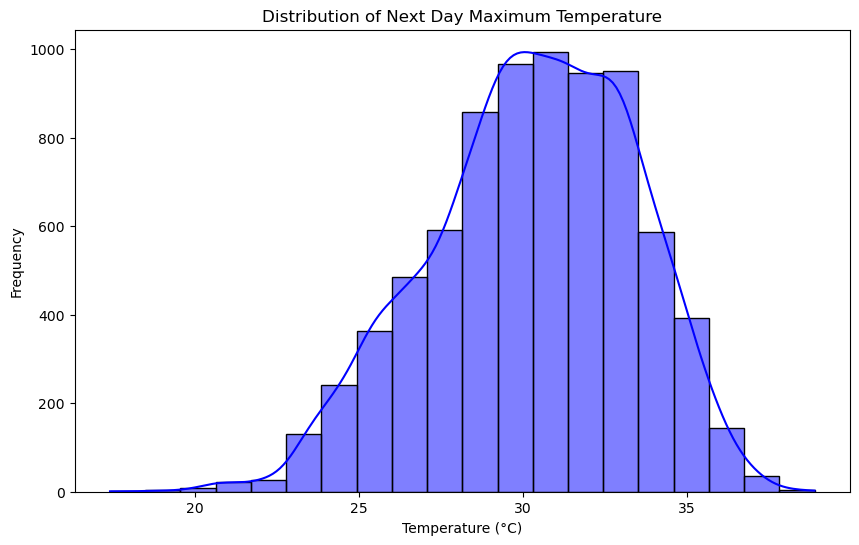

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Next_Tmax'], bins=20, color='blue', kde=True)
plt.title('Distribution of Next Day Maximum Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

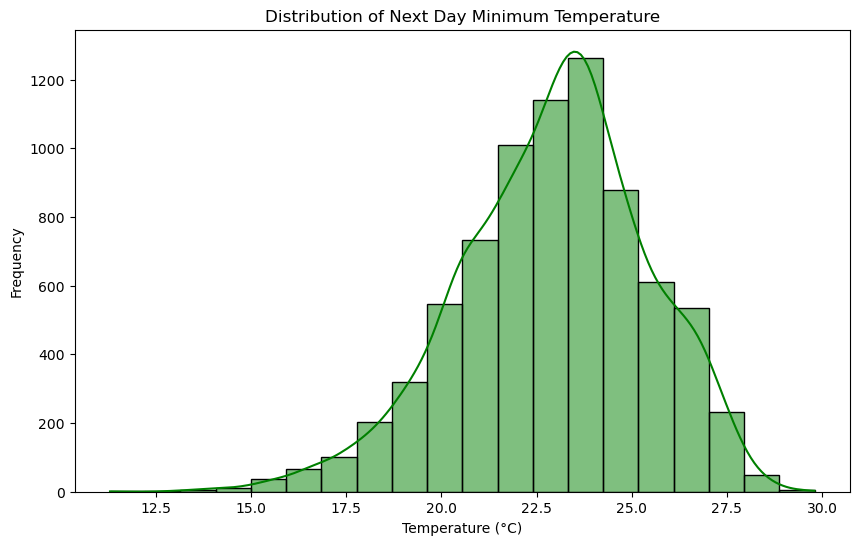

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Next_Tmin'], bins=20, color='green', kde=True)
plt.title('Distribution of Next Day Minimum Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [24]:
df.drop(['Date'], axis=1, inplace=True)

In [25]:
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = df['Next_Tmax']
y_min = df['Next_Tmin']

In [26]:
X_train, X_test, y_max_train, y_max_test, y_min_train, y_min_test = train_test_split(X, y_max, y_min, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
lr_max=LinearRegression()
lr_max.fit(X_train_scaled,y_max_train)
lr_max_pred=lr_max.predict(X_test_scaled)
lr_max_rmse=mean_squared_error(y_max_test,lr_max_pred,squared=False)

lr_min=LinearRegression()
lr_min.fit(X_train_scaled,y_min_train)
lr_min_pred=lr_min.predict(X_test_scaled)
lr_min_rmse=mean_squared_error(y_min_test,lr_min_pred,squared=False)

print("linear regression model:")
print("RMSE for max temperature:",lr_max_rmse)
print("RMSE for min temperature:",lr_min_rmse)

linear regression model:
RMSE for max temperature: 1.4966291529673215
RMSE for min temperature: 0.980996689886323


In [29]:
rf_max=RandomForestRegressor(random_state=42)
rf_max.fit(X_train_scaled,y_max_train)
rf_max_pred=rf_max.predict(X_test_scaled)
rf_max_rmse=mean_squared_error(y_max_test,rf_max_pred,squared=False)

rf_min=RandomForestRegressor(random_state=42)
rf_min.fit(X_train_scaled,y_min_train)
rf_min_pred=rf_min.predict(X_test_scaled)
rf_min_rmse=mean_squared_error(y_min_test,rf_min_pred,squared=False)

print("\nRandom forest regressor:")
print("RMSE for max temperature:",rf_max_rmse)
print("RMSE for min temperature:",rf_min_rmse)


Random forest regressor:
RMSE for max temperature: 0.9283685916053156
RMSE for min temperature: 0.7431746959709034


In [30]:
from sklearn.model_selection import learning_curve

In [31]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [32]:
cv=5
lr_max_scores = cross_val_score(lr_max, X_train_scaled, y_max_train, scoring='neg_mean_squared_error', cv=cv)
lr_min_scores = cross_val_score(lr_min, X_train_scaled, y_min_train, scoring='neg_mean_squared_error', cv=cv)
lr_max_rmse_cv = np.sqrt(-lr_max_scores)
lr_min_rmse_cv = np.sqrt(-lr_min_scores)

print("Linear Regression Model (Maximum Temperature):")
print("RMSE - Cross Validation:", lr_max_rmse_cv.mean())
print("R-squared:", r2_score(y_max_test, lr_max_pred))

print("\nLinear Regression Model (Minimum Temperature):")
print("RMSE - Cross Validation:", lr_min_rmse_cv.mean())
print("R-squared:", r2_score(y_min_test, lr_min_pred))

# Random Forest Regression
rf_max_scores = cross_val_score(rf_max, X_train_scaled, y_max_train, scoring='neg_mean_squared_error', cv=cv)
rf_min_scores = cross_val_score(rf_min, X_train_scaled, y_min_train, scoring='neg_mean_squared_error', cv=cv)
rf_max_rmse_cv = np.sqrt(-rf_max_scores)
rf_min_rmse_cv = np.sqrt(-rf_min_scores)

print("\nRandom Forest Regression Model (Maximum Temperature):")
print("RMSE - Cross Validation:", rf_max_rmse_cv.mean())
print("R-squared:", r2_score(y_max_test, rf_max_pred))

print("\nRandom Forest Regression Model (Minimum Temperature):")
print("RMSE - Cross Validation:", rf_min_rmse_cv.mean())
print("R-squared:", r2_score(y_min_test, rf_min_pred))

Linear Regression Model (Maximum Temperature):
RMSE - Cross Validation: 1.5073948932960994
R-squared: 0.7602963745822238

Linear Regression Model (Minimum Temperature):
RMSE - Cross Validation: 1.0349044592711354
R-squared: 0.8383519362143769

Random Forest Regression Model (Maximum Temperature):
RMSE - Cross Validation: 1.0066683766876674
R-squared: 0.9077668418649951

Random Forest Regression Model (Minimum Temperature):
RMSE - Cross Validation: 0.793789417338392
R-squared: 0.9072279290739713


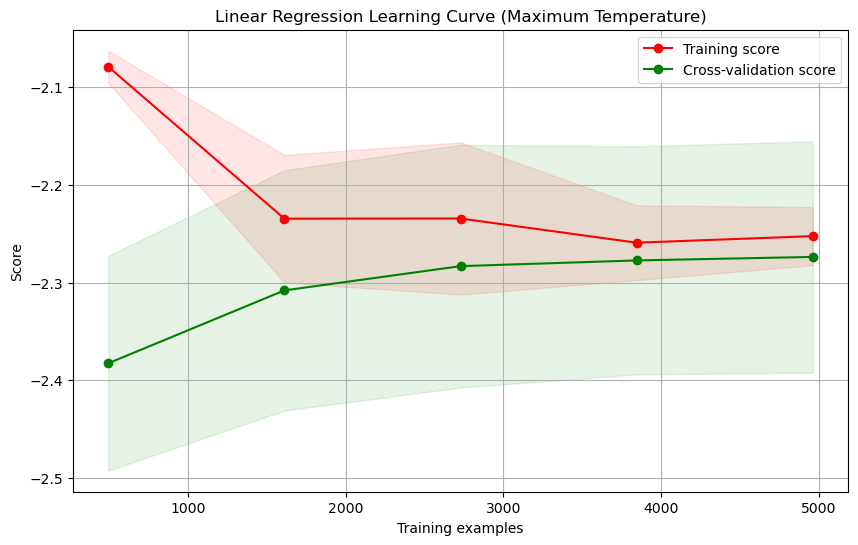

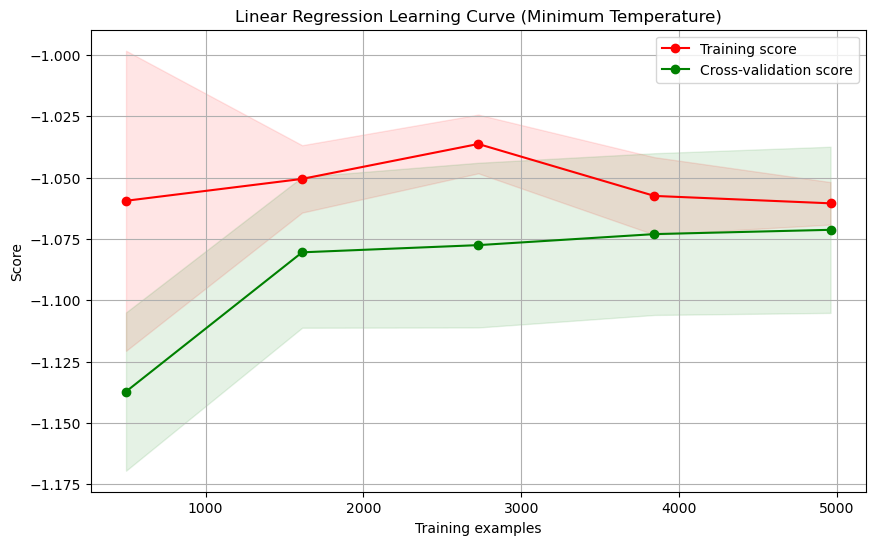

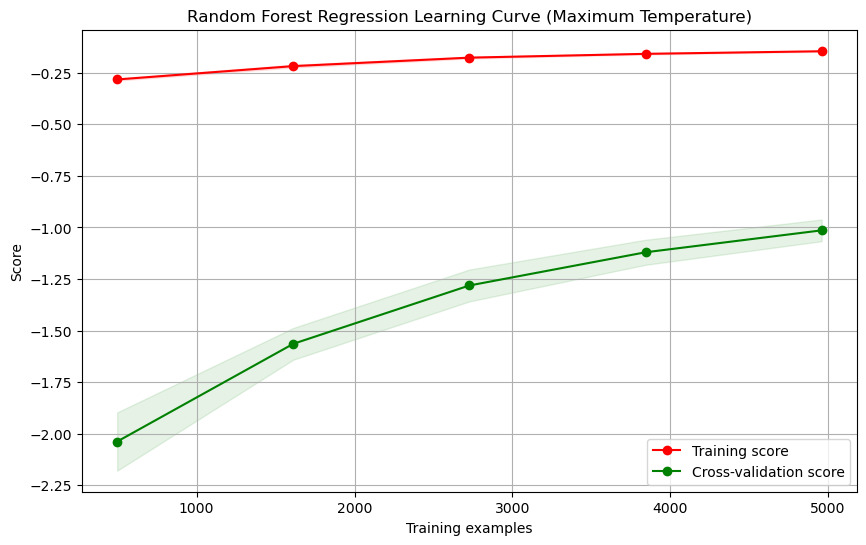

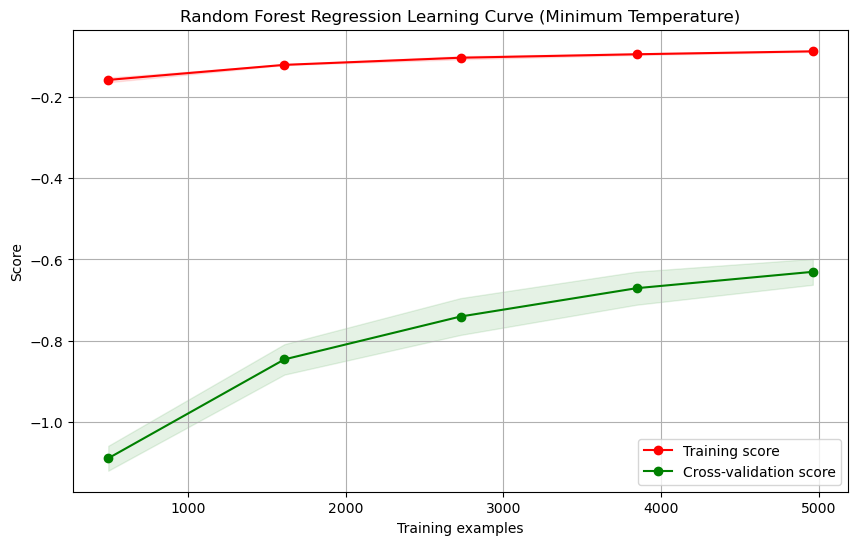

In [63]:
plot_learning_curve(lr_max, "Linear Regression Learning Curve (Maximum Temperature)", X_train_scaled, y_max_train, cv=cv)
plt.show()

plot_learning_curve(lr_min, "Linear Regression Learning Curve (Minimum Temperature)", X_train_scaled, y_min_train, cv=cv)
plt.show()

plot_learning_curve(rf_max, "Random Forest Regression Learning Curve (Maximum Temperature)", X_train_scaled, y_max_train, cv=cv)
plt.show()

plot_learning_curve(rf_min, "Random Forest Regression Learning Curve (Minimum Temperature)", X_train_scaled, y_min_train, cv=cv)
plt.show()


In [64]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf_max = GridSearchCV(rf_max, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_rf_max.fit(X_train_scaled[:1000], y_max_train[:1000])

best_params_max = grid_rf_max.best_params_
best_estimator_max = grid_rf_max.best_estimator_

print("Best Parameters (Maximum Temperature):", best_params_max)
print("Best Estimator (Maximum Temperature):", best_estimator_max)

best_rf_max_pred = best_estimator_max.predict(X_test_scaled)
best_rf_max_rmse = np.sqrt(mean_squared_error(y_max_test, best_rf_max_pred))
print("RMSE (Maximum Temperature) - Best Model:", best_rf_max_rmse)
print("R-squared (Maximum Temperature) - Best Model:", r2_score(y_max_test, best_rf_max_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters (Maximum Temperature): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator (Maximum Temperature): RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)
RMSE (Maximum Temperature) - Best Model: 1.2941643677572379
R-squared (Maximum Temperature) - Best Model: 0.8207640682789639


In [65]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf_min = GridSearchCV(rf_min, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_rf_min.fit(X_train_scaled, y_min_train)
best_params_min = grid_rf_min.best_params_
best_estimator_min = grid_rf_min.best_estimator_

print("Best Parameters (Minimum Temperature):", best_params_min)
print("Best Estimator (Minimum Temperature):", best_estimator_min)

best_rf_min_pred = best_estimator_min.predict(X_test_scaled)
best_rf_min_rmse = np.sqrt(mean_squared_error(y_min_test, best_rf_min_pred))
print("RMSE (Minimum Temperature) - Best Model:", best_rf_min_rmse)
print("R-squared (Minimum Temperature) - Best Model:", r2_score(y_min_test, best_rf_min_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters (Minimum Temperature): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator (Minimum Temperature): RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)
RMSE (Minimum Temperature) - Best Model: 0.7413176037248702
R-squared (Minimum Temperature) - Best Model: 0.9076909992902162


In [66]:
import joblib

In [67]:
joblib.dump(best_estimator_max, 'best_rf_max_model.joblib')

['best_rf_max_model.joblib']

In [68]:
joblib.dump(best_estimator_min, 'best_rf_min_model.joblib')

['best_rf_min_model.joblib']

In [69]:
best_rf_max_model = joblib.load('best_rf_max_model.joblib')

In [70]:
best_rf_min_model = joblib.load('best_rf_min_model.joblib')

In [71]:
result=best_rf_max_model.score(X_test_scaled,y_max_test)
print(result*100)

82.07640682789639


In [72]:
result=best_rf_min_model.score(X_test_scaled,y_min_test)
print(result*100)

90.76909992902162
